In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6378 entries, 1995-01-03 to 2020-05-01
Data columns (total 4 columns):
PG      6378 non-null float64
MSFT    6378 non-null float64
F       6378 non-null float64
GE      6378 non-null float64
dtypes: float64(4)
memory usage: 249.1 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.413537,3.256691,2.729230
1995-01-04,6.269589,2.431082,3.344314,2.729230
1995-01-05,6.180927,2.390982,3.315107,2.735919
1995-01-06,6.193593,2.431082,3.315107,2.722540
1995-01-09,6.168259,2.416045,3.373522,2.695783


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-04-27,117.449997,174.050003,5.17,6.430
2020-04-28,116.889999,169.809998,5.38,6.800
2020-04-29,117.080002,177.429993,5.26,6.580
2020-04-30,117.870003,179.210007,5.09,6.800
2020-05-01,117.809998,175.889999,4.92,6.429


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [8]:
mydata.iloc[0] *100

PG      632.025194
MSFT    241.353726
F       325.669050
GE      272.923040
Name: 1995-01-03 00:00:00, dtype: float64

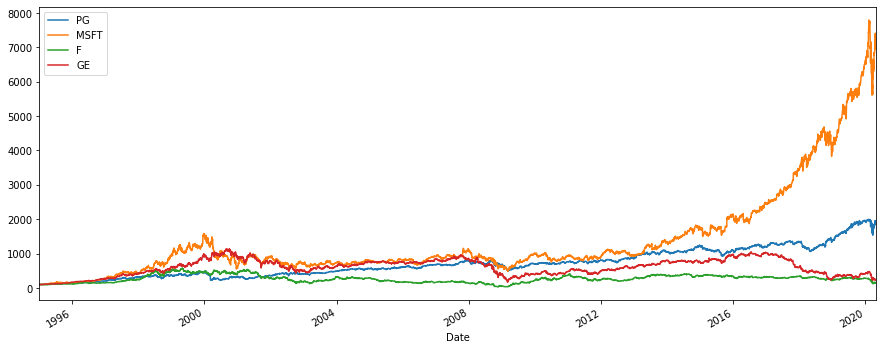

In [12]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

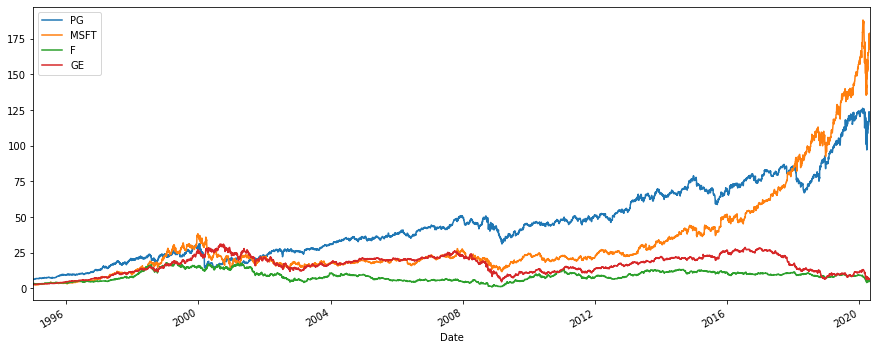

In [11]:
mydata.plot(figsize=(15,6))
plt.show()

In [9]:
mydata.loc['1995-01-03']

PG      6.320252
MSFT    2.413537
F       3.256691
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

In [10]:
mydata.iloc[0]

PG      6.320252
MSFT    2.413537
F       3.256691
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [13]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [14]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [16]:
np.dot(returns, weights)

array([        nan,  0.00653978, -0.0092298 , ..., -0.00203966,
        0.00447376, -0.02674814])

***

In [19]:
annual_returns = returns.mean() * 250
annual_returns 

PG      0.140665
MSFT    0.218321
F       0.095420
GE      0.083011
dtype: float64

In [20]:
np.dot(annual_returns, weights)

0.1343544002756748

In [21]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

13.435 %


***

In [22]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [23]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

13.435 %
16.206 %
